<a href="https://colab.research.google.com/github/OleksandrRyzhov2299/math_colab/blob/main/HW_10_Ryzhov_O_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина 1. Аналіз та підготовка даних

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Work with data

In [ ]:
sleep_efficiency_path = '/content/drive/MyDrive/Sleep_Efficiency.csv'

df = pd.read_csv(sleep_efficiency_path)
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


Опис даних

In [ ]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [ ]:
# Перетворення часу сну на числові змінні (кількість хвилин від початку дня)
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df['Bedtime_minutes'] = df['Bedtime'].dt.hour * 60 + df['Bedtime'].dt.minute
df['Wakeup_minutes'] = df['Wakeup time'].dt.hour * 60 + df['Wakeup time'].dt.minute

# Перетворення категоріальних змінних у числові
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})

Перервірка на пропуски

In [ ]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
Bedtime_minutes            0
Wakeup_minutes             0
dtype: int64


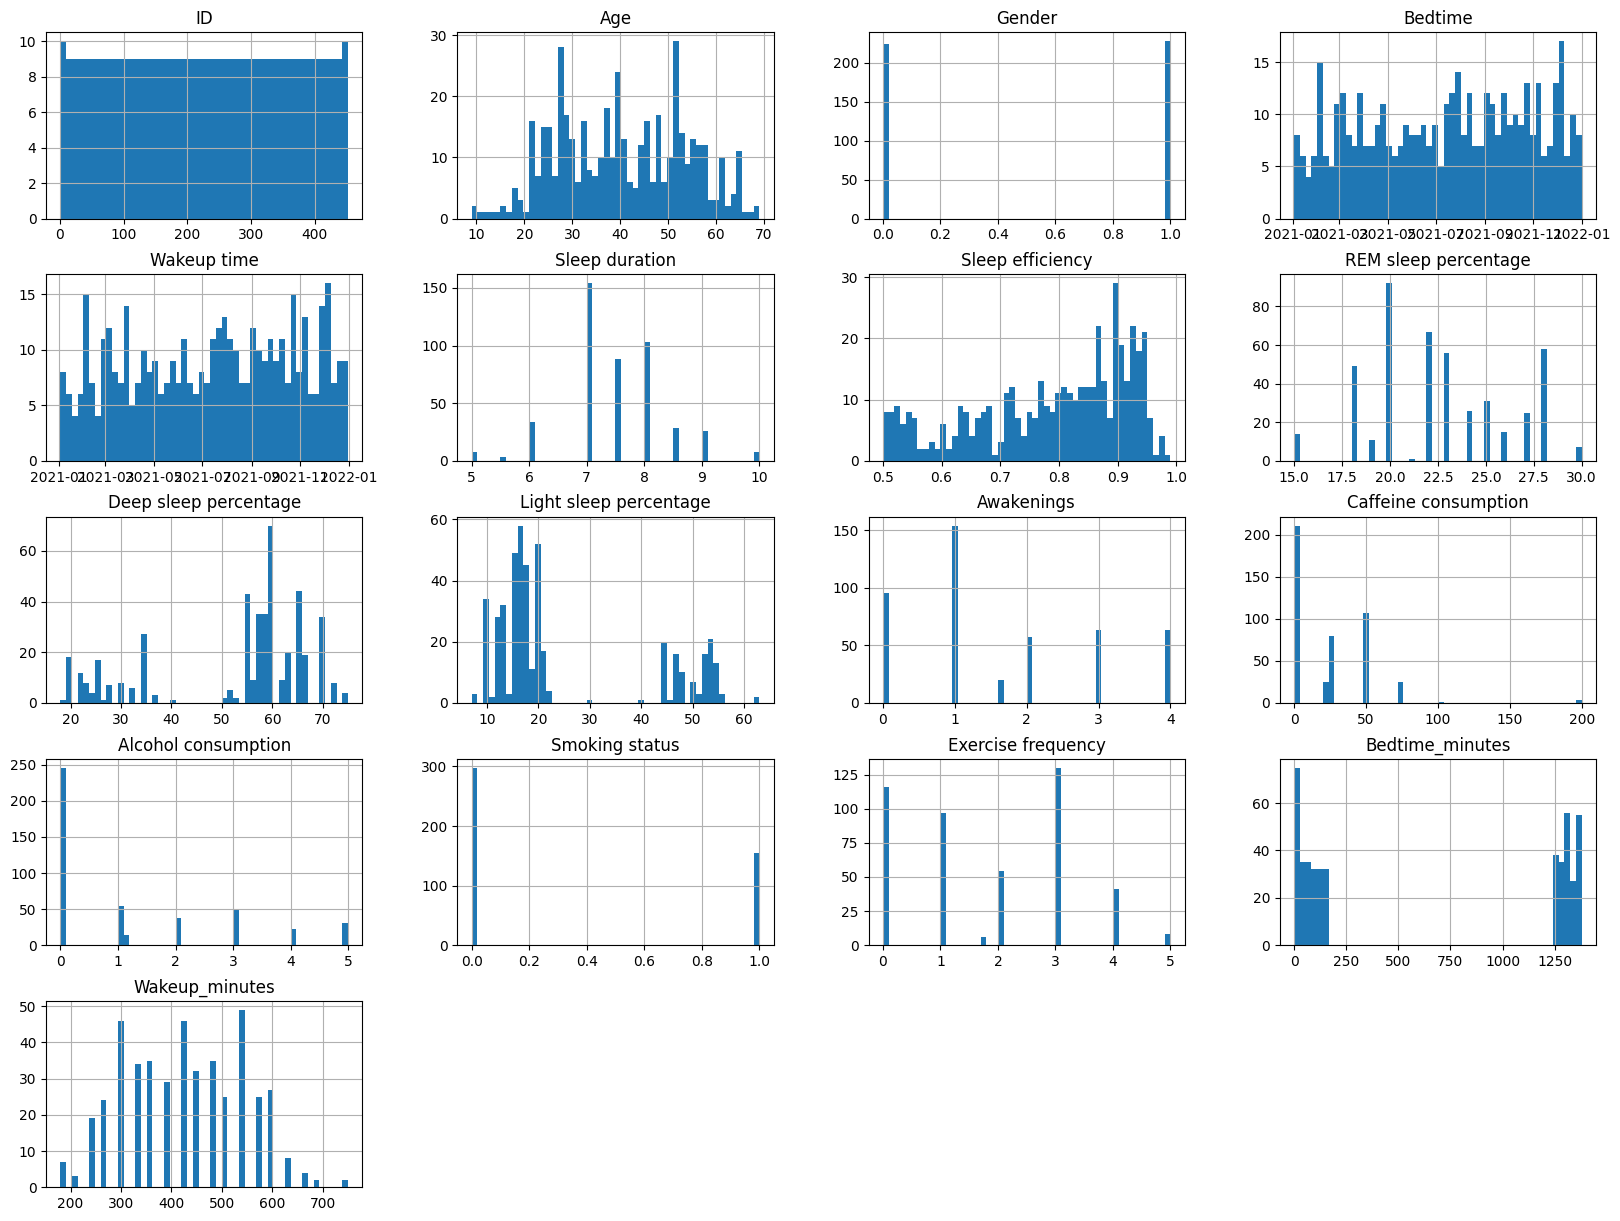

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Кореляційна матриця:
                               ID       Age    Gender   Bedtime  Wakeup time  \
ID                      1.000000  0.021310 -0.013124 -0.061147    -0.061688   
Age                     0.021310  1.000000  0.244468 -0.026877    -0.026533   
Gender                 -0.013124  0.244468  1.000000 -0.061849    -0.061733   
Bedtime                -0.061147 -0.026877 -0.061849  1.000000     0.999988   
Wakeup time            -0.061688 -0.026533 -0.061733  0.999988     1.000000   
Sleep duration          0.014333 -0.062462 -0.044376  0.029673     0.030566   
Sleep efficiency       -0.025624  0.098357  0.010062 -0.007848    -0.008488   
REM sleep percentage    0.051636  0.042091 -0.161102  0.038341     0.038283   
Deep sleep percentage  -0.047300  0.021730  0.075939 -0.042009    -0.042446   
Light sleep percentage  0.036463 -0.031905 -0.040534  0.034116     0.034576   
Awakenings             -0.055429 -0.017468  0.074205 -0.014646    -0.014144   
Caffeine consumption   -0.0575

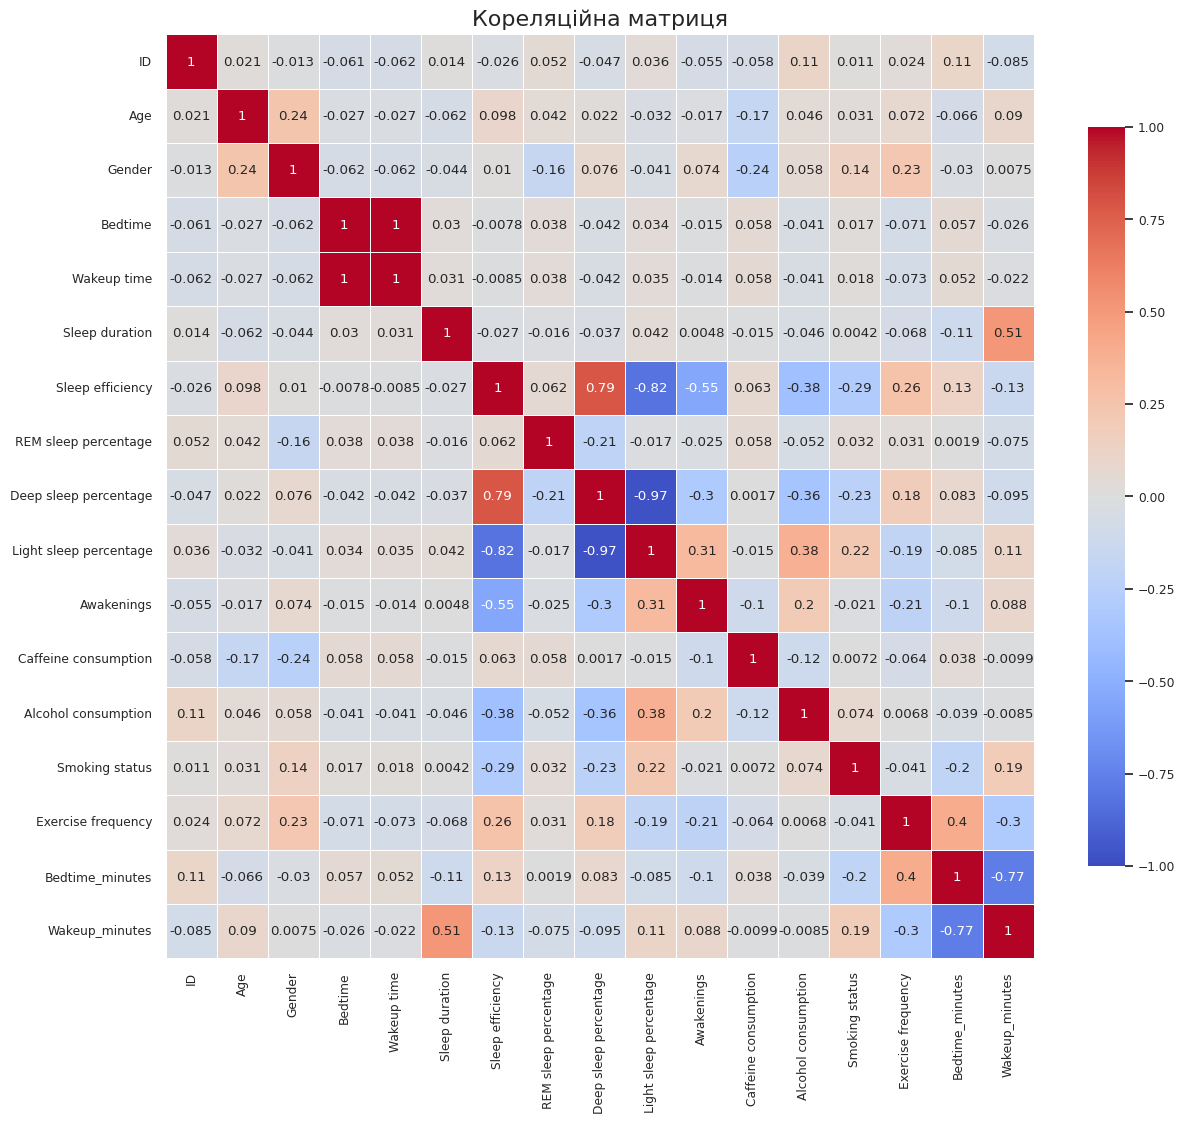

In [ ]:
corr_matrix = df.corr()
# Виведення кореляційної матриці
print('Кореляційна матриця:\n', corr_matrix)

# Візуалізація кореляційної матриці за допомогою heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Кореляційна матриця', fontsize=16)
plt.show()

# Частина 2. Моделювання

In [ ]:

# Видалення оригінальних стовпців часу сну
if 'Bedtime' in df.columns and 'Wakeup time' in df.columns:
    df.drop(['Bedtime', 'Wakeup time'], axis=1, inplace=True)

# Розділення на цільову змінну та ознаки
X = df.drop(['Sleep efficiency'], axis=1)
y = df['Sleep efficiency']

# Розподіл на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення та тренування першої моделі (лінійна регресія)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

# Створення та тренування другої моделі (дерево рішень)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree_reg = tree_reg.predict(X_test)

# Оцінка якості моделей
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)

r2_tree_reg = r2_score(y_test, y_pred_tree_reg)
mae_tree_reg = mean_absolute_error(y_test, y_pred_tree_reg)

r2_lin_reg, mae_lin_reg, r2_tree_reg, mae_tree_reg


(0.7894097485556975,
 0.05112616222208339,
 0.787929005903635,
 0.04714285714285713)

Результати оцінки якості побудованих моделей виглядають наступним чином:

Лінійна регресія:

R² (коефіцієнт детермінації): 0.7894
MAE (середня абсолютна похибка): 0.0511
Дерево рішень:

R² (коефіцієнт детермінації): 0.7879
MAE (середня абсолютна похибка): 0.0471
Аналіз якості моделей
1. Коефіцієнт детермінації (R²)
Коефіцієнт детермінації R² показує, яку частку варіації цільової змінної пояснює модель. Значення R² близьке до 1 свідчить про те, що модель добре підходить для прогнозування даних.

Лінійна регресія: R² = 0.7894 означає, що модель пояснює 78.94% варіації в цільовій змінній.
Дерево рішень: R² = 0.7879 означає, що модель пояснює 78.79% варіації в цільовій змінній.
Оскільки значення R² обох моделей дуже близькі та обидва досить високі, можна сказати, що обидві моделі добре пояснюють дані.

2. Середня абсолютна похибка (MAE)
Середня абсолютна похибка (MAE) вимірює середню величину помилок прогнозу моделі в одиницях цільової змінної. Нижче значення MAE вказує на більш точний прогноз.

Лінійна регресія: MAE = 0.0511
Дерево рішень: MAE = 0.0471
Значення MAE вказують на те, що в середньому помилка прогнозу моделей є невеликою. Дерево рішень має трохи меншу середню похибку порівняно з лінійною регресією, що свідчить про його трохи вищу точність.

Висновки
Обидві моделі показали хорошу якість прогнозування з високими значеннями R² і низькими значеннями MAE.
Дерево рішень має трохи кращу точність (нижча MAE) порівняно з лінійною регресією.
Вибір між цими моделями може залежати від інших факторів, таких як інтерпретованість моделі, швидкість навчання та прогнозування, а також вимоги до ресурсів.
Таким чином, обидві моделі можна вважати прийнятними для прогнозування "Sleep efficiency", але дерево рішень трохи краще у плані точності.

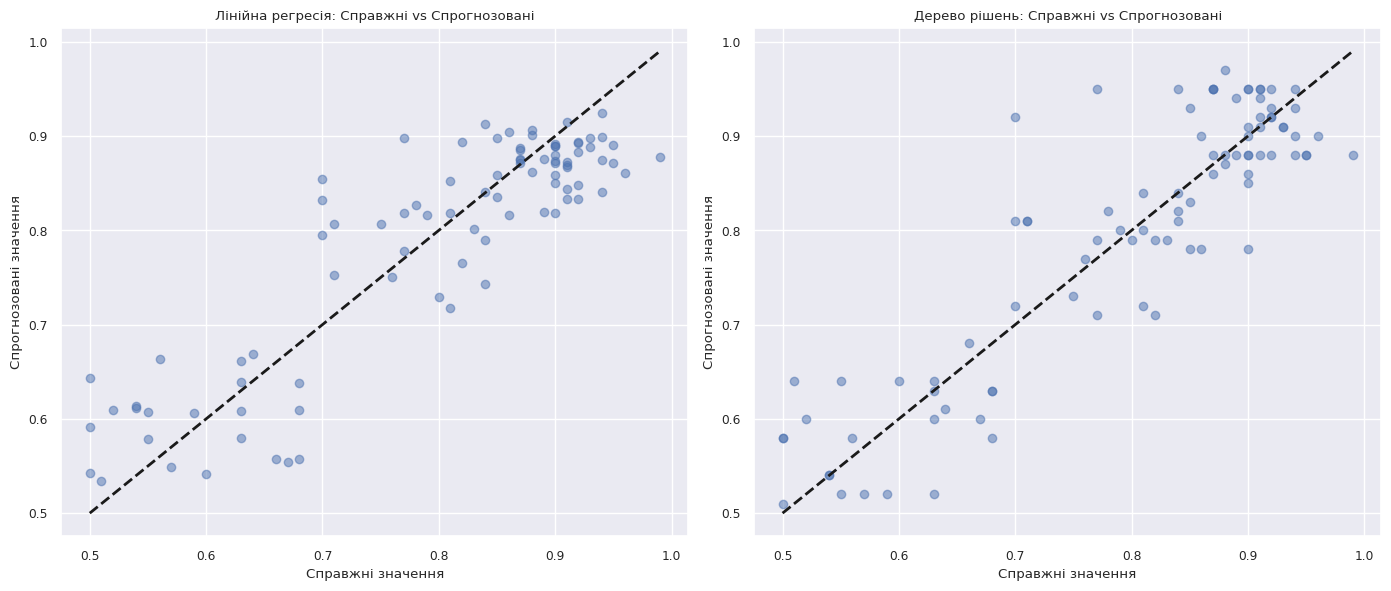

In [ ]:
# Графік для лінійної регресії
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Лінійна регресія: Справжні vs Спрогнозовані')

# Графік для дерева рішень
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree_reg, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Дерево рішень: Справжні vs Спрогнозовані')

plt.tight_layout()
plt.show()